## Telco Customer Churn Analysis

### Contextualization
- Telco has been facing challenges in customer retention, with a significant increase in churn rate in recent periods. This issue directly affects the company's revenue, making it crucial to identify the key drivers of service cancellations and implement effective retention strategies.
### Project Objective
1. The objective of this project is to analyze the main challenges companies face regarding churn and develop approaches to mitigate its impact. To achieve this, we will conduct an exploratory data analysis (EDA) and apply statistical and machine learning techniques to:
- Identify customers with the highest likelihood of cancellation;
- Analyze the key factors contributing to churn.

With this approach, we aim to provide strategic insights that support decision-making and the development of actions focused on reducing churn and increasing customer retention.

### Importing the libraries

In [4]:
# Data manipulation and visualization.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries of Statistics
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint, uniform
import xgboost as xgb
import lightgbm as lgb
import joblib

# Split the data.
from sklearn.model_selection import train_test_split

# Filter warnings.
import warnings
warnings.filterwarnings('ignore')

# Visualization Settings
%matplotlib inline

# show all columns 
pd.set_option("display.max_columns", None)

### Understanding the data:

- The dataset was collected from kaggle: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data
- The data set includes information about:
1. Customers who left within the last month – the column is called Churn;
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies;
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges;
4. Demographic info about customers – gender, age range, and if they have partners and dependents;

In [5]:
df = pd.read_csv('C:/Users/gabim/OneDrive/Documentos/Códigos python/Projeto - Telco Customer Churn/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA:

#### Data dictionary:

1. customerID: Unique identifier for each customer.
2. gender: Customer's gender (Male or Female).
3. SeniorCitizen: Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).
4. Partner: Indicates whether the customer has a partner/spouse (Yes or No).
5. Dependents: Indicates whether the customer has dependents (Yes or No).
6. Tenure: Number of months the customer has been with the company. Higher values indicate longer retention.
7. PhoneService: Indicates whether the customer has a phone service (Yes or No).
8. MultipleLines: Indicates whether the customer has multiple phone lines (Yes, No, or No phone service).
9. InternetService: Type of internet service (DSL, Fiber optic, or No).
10. OnlineSecurity: Indicates whether the customer has an online security service (Yes, No, or No internet service).
11. OnlineBackup: Indicates whether the customer has an online backup service (Yes, No, or No internet service).
12. DeviceProtection: Indicates whether the customer has device protection (Yes, No, or No internet service).
13. TechSupport: Indicates whether the customer has technical support (Yes, No, or No internet service).
14. StreamingTV: Indicates whether the customer has a TV streaming service (Yes, No, or No internet service).
15. StreamingMovies: Indicates whether the customer has a movie streaming service (Yes, No, or No internet service).
16. Contract: Type of customer contract (Month-to-month, One year, Two year).
17. PaperlessBilling: Indicates whether the customer has opted for paperless billing (Yes or No).
18. PaymentMethod: Customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
19. MonthlyCharges: Monthly charge amount billed to the customer (in dollars).
20. TotalCharges: Total amount paid by the customer since the beginning of the contract (in dollars).
21. Churn: Indicates whether the customer has churned (Yes or No). This is the target variable for churn analysis.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 7043 rows and 21 columns


- The data type format of the column "TotalCharges" needs to be changed since it must be a float type.

In [8]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors= 'coerce')

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


- SeniorCitizen: Approximately 16% of customers are senior citizens, meaning the majority are not in this age group. This could be a relevant factor for churn, as younger customers may be less loyal to the service.
- Tenure: The average customer tenure is 32 months, ranging from a minimum of 0 months to a maximum of 72 months (6 years). The median indicates that half of the customers stay with the service for up to 29 months.
- MonthlyCharges: The average monthly charge is $64.76, with values ranging from $18.25 to $118.75. The median indicates that half of the customers pay up to $70.35 per month.
- TotalCharges: There are some missing values in this variable. On average, customers pay a total of $2,283.30, with values ranging from $18.80 to $8,684.80. The median indicates that half of the customers have paid up to $1,397.47 over their service period.

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- We will fill the missing values in the TotalCharges column using the SimpleImputer method with the mean strategy.

In [11]:
imputer = SimpleImputer(strategy='mean')
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- I will drop the customerID column because the variable won't be useful for analysis.

In [13]:
# Drop CustomerID
df.drop(columns='customerID', inplace=True)
'customerID' in df

False

In [14]:
# Checking if there are duplicated rows
df.duplicated().sum()

np.int64(22)

In [15]:
# Drop duplicated rows
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [16]:
# I will rename the columns in a standard format in order to turn the data manipulation easier.
df.columns = [x.lower() for x in df.columns]

In [17]:
# Checking unique values
for column in df:
    print(f'Count of values for the column: {column}')
    print(df[column].value_counts())
    print('-'*50)

Count of values for the column: gender
gender
Male      3541
Female    3480
Name: count, dtype: int64
--------------------------------------------------
Count of values for the column: seniorcitizen
seniorcitizen
0    5880
1    1141
Name: count, dtype: int64
--------------------------------------------------
Count of values for the column: partner
partner
No     3619
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Count of values for the column: dependents
dependents
No     4911
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
Count of values for the column: tenure
tenure
1     591
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
--------------------------------------------------
Count of values for the column: phoneservice
phoneservice
Yes    6339
No      682
Name: count, dtype: int64
---------------------------------

- There are some columns with the value "No internet service." I will convert them to "No" to simplify the model analysis.

In [18]:
df.replace('No internet service', 'No', inplace=True)

In [19]:
# I will make a copy of the DataFrame to preserve the original data.
df_backup = df.copy()

### Target distribution:

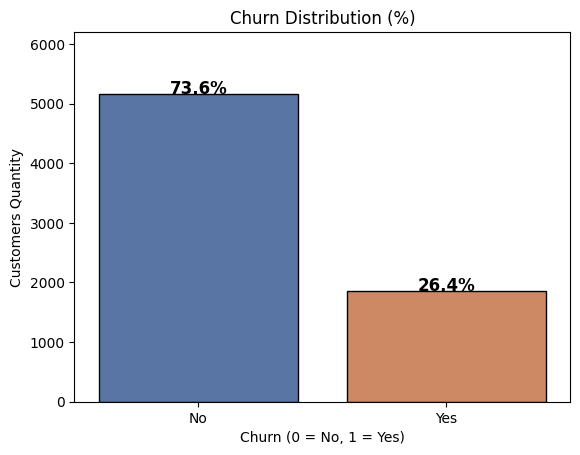

In [20]:
total = len(df_backup)
count = df_backup['churn'].value_counts()
percent = (count/total) * 100

ax = sns.countplot(x=df_backup["churn"], palette='deep', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    large = p.get_x() + p.get_width() / 2
    values = (height / total) * 100
    ax.text(large, height + 1, f'{values:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.title("Churn Distribution (%)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customers Quantity")
plt.ylim(0, max(count) * 1.2)
plt.show()

### Numerical features distribution:

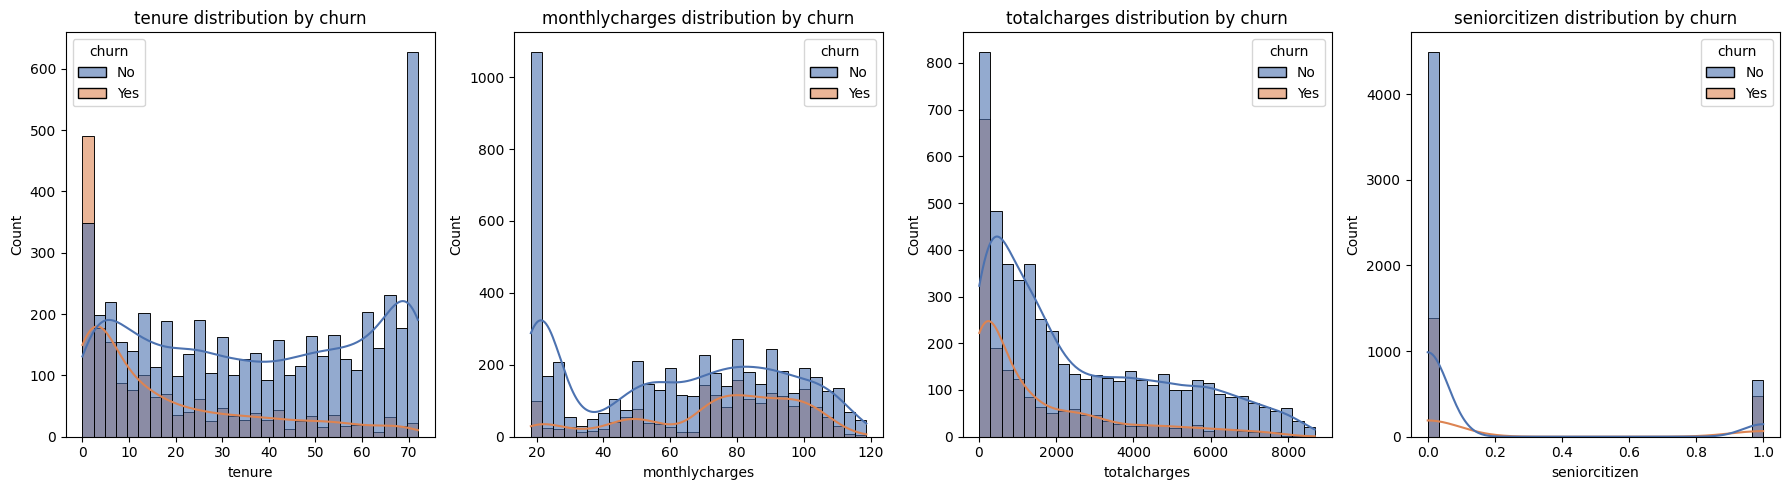

In [21]:
numerical_features = ['tenure', 'monthlycharges', 'totalcharges', 'seniorcitizen']

fig, axes = plt.subplots(1,4, figsize=(18,5))

for i, column in enumerate(numerical_features):
    sns.histplot(data=df_backup, x=column, hue='churn', kde=True, bins=30, palette='deep', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{column} distribution by churn')

plt.tight_layout()
plt.show()

### Outliers:

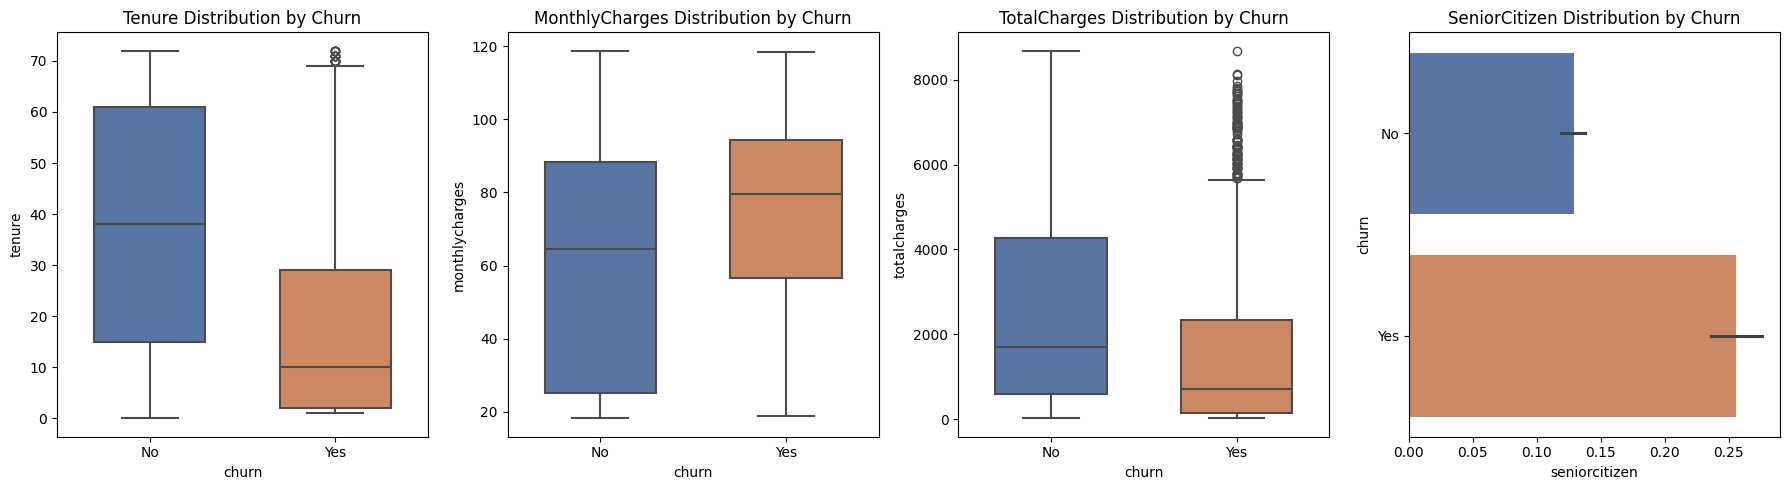

In [22]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))

sns.boxplot(x='churn', y='tenure', data=df_backup, ax=axes[0], palette='deep', width=0.6, showfliers=True, linewidth=1.5)
axes[0].set_title('Tenure Distribution by Churn')

sns.boxplot(x='churn', y='monthlycharges', data=df_backup, ax=axes[1], palette='deep', width=0.6, showfliers=True, linewidth=1.5)
axes[1].set_title('MonthlyCharges Distribution by Churn')

sns.boxplot(x='churn', y='totalcharges', data=df_backup, ax=axes[2], palette='deep', width=0.6, showfliers=True, linewidth=1.5)
axes[2].set_title('TotalCharges Distribution by Churn')

sns.barplot(x='seniorcitizen', y='churn', data=df_backup, ax=axes[3], palette='deep')
axes[3].set_title('SeniorCitizen Distribution by Churn')

plt.tight_layout()
plt.show()

### Insights:

1. Tenure: 
The histplot shows a high churn rate starting from 0 months, which may indicate that many customers sign up and cancel the service shortly after. Additionally, there is a significant accumulation around 70 months, suggesting that some customers stay for a long period. Beyond these points, the distribution is more scattered, covering different tenure stages.
In the boxplot, some outliers indicate that certain customers remain subscribed for an extended period before canceling. Overall, the data suggests that new customers are more likely to churn.

2. MonthlyCharges:
The histplot analysis suggests that customers who pay lower monthly fees tend to have a lower churn rate. For higher amounts, the distribution appears more uniform.
However, a deeper analysis in the boxplot reveals that customers who pay $80.00 or more tend to have a higher churn rate.

3. TotalCharges:
The histplot indicates that most customers who churn do not accumulate a significant TotalCharges amount.
In the boxplot, it is evident that the median of churned customers is significantly lower than that of retained customers, confirming that many customers cancel before accumulating a high total charge. Additionally, in the Churn = Yes group, there are several outliers, showing that some customers churn despite having high TotalCharges. This suggests that while most cancellations occur among new or low-revenue customers, there are also cases where long-term customers decide to leave.

4. SeniorCitizen:
Most customers are not senior citizens. However, among those who are, there is a higher tendency to churn.

### Categorical features distributions:

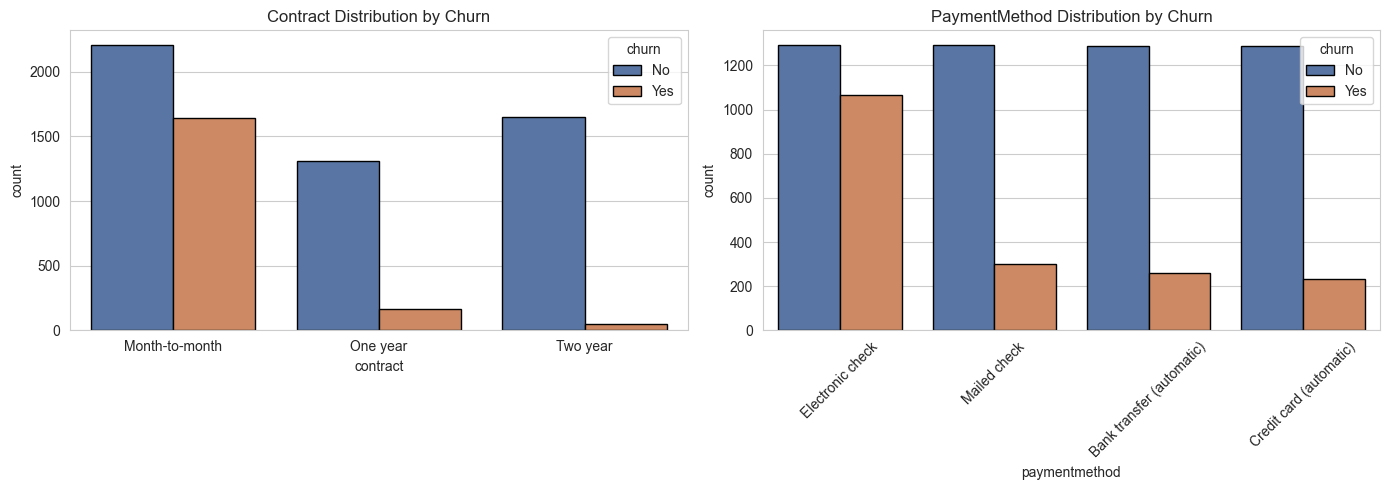

In [23]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data=df_backup, x='contract', hue='churn', ax=axes[0], palette='deep', edgecolor='black')
axes[0].set_title('Contract Distribution by Churn')

sns.countplot(data=df_backup, x='paymentmethod', hue='churn', ax=axes[1], palette='deep', edgecolor='black')
axes[1].set_title('PaymentMethod Distribution by Churn')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [24]:
contract_ct = pd.crosstab(df_backup['contract'], df_backup['churn'], normalize='index') * 100
payment_ct = pd.crosstab(df_backup['paymentmethod'], df_backup['churn'], normalize='index') * 100

contract_ct = contract_ct.applymap(lambda x: f'{x:.2f}%')
payment_ct = payment_ct.applymap(lambda x: f'{x:.2f}%')

print('\nContigency Table - Contract x Churn:')
print(contract_ct)
print('--'*20)
print('\nContigency Table - Payment Method x Churn:')
print(payment_ct)


Contigency Table - Contract x Churn:
churn               No     Yes
contract                      
Month-to-month  57.36%  42.64%
One year        88.73%  11.27%
Two year        97.17%   2.83%
----------------------------------------

Contigency Table - Payment Method x Churn:
churn                          No     Yes
paymentmethod                            
Bank transfer (automatic)  83.29%  16.71%
Credit card (automatic)    84.76%  15.24%
Electronic check           54.85%  45.15%
Mailed check               81.08%  18.92%


In [25]:
CrossTabContract = pd.crosstab(index=df_backup['churn'], columns=df_backup['contract'])
CrossTabPayment = pd.crosstab(index=df_backup['churn'], columns=df_backup['paymentmethod'])

chi2_ct, p_ct, _, _ = chi2_contingency(CrossTabContract)
chi2_pm, p_pm, _, _ = chi2_contingency(CrossTabPayment)

print(f'\nChi-Square Test - Contract x Churn: p-valor = {p_ct:.4f}')
print(f'\nChi-Square Test - Payment Method x Churn: p-valor = {p_pm:.4f}\n')

alpha = 0.05
if p_ct < alpha:
    print('The relationship between Contract and Churn is statistically significant.')
else:
    print('There is no statistical evidence that Contract influences Churn.')

if p_pm < alpha:
    print('\nThe relationship between PaymentMethod and Churn is statistically significant.')
else:
    print('There is no statistical evidence that PaymentMethod influences Churn.')


Chi-Square Test - Contract x Churn: p-valor = 0.0000

Chi-Square Test - Payment Method x Churn: p-valor = 0.0000

The relationship between Contract and Churn is statistically significant.

The relationship between PaymentMethod and Churn is statistically significant.


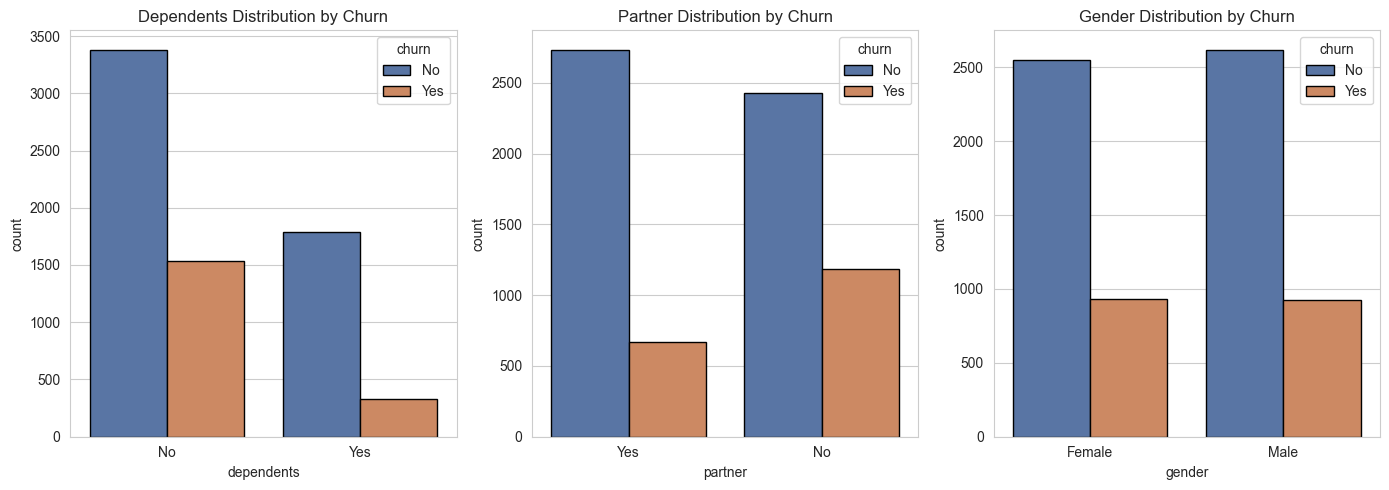

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.countplot(data=df_backup, x='dependents', hue='churn', ax=axes[0], palette='deep', edgecolor='black')
axes[0].set_title('Dependents Distribution by Churn')

sns.countplot(data=df_backup, x='partner', hue='churn', ax=axes[1], palette='deep', edgecolor='black')
axes[1].set_title('Partner Distribution by Churn')

sns.countplot(data=df_backup, x='gender', hue='churn', ax=axes[2], palette='deep', edgecolor='black')
axes[2].set_title('Gender Distribution by Churn')

plt.tight_layout()
plt.show()

In [27]:
dependents_ct = pd.crosstab(df_backup['dependents'], df_backup['churn'], normalize='index') * 100
partner_ct = pd.crosstab(df_backup['partner'], df_backup['churn'], normalize='index') * 100
gender_ct = pd.crosstab(df_backup['gender'], df_backup['churn'], normalize='index') * 100

dependents_ct = dependents_ct.applymap(lambda x: f'{x:.2f}%')
partner_ct = partner_ct.applymap(lambda x: f'{x:.2f}%')
gender_ct = gender_ct.applymap(lambda x: f'{x:.2f}%')

print('\nContigency Table - Dependents x Churn:')
print(dependents_ct)
print('--'*20)
print('\nContigency Table - Partner x Churn:')
print(partner_ct)
print('--'*20)
print('\nContigency Table - Gender x Churn:')
print(gender_ct)


Contigency Table - Dependents x Churn:
churn           No     Yes
dependents                
No          68.83%  31.17%
Yes         84.55%  15.45%
----------------------------------------

Contigency Table - Partner x Churn:
churn        No     Yes
partner                
No       67.17%  32.83%
Yes      80.34%  19.66%
----------------------------------------

Contigency Table - Gender x Churn:
churn       No     Yes
gender                
Female  73.16%  26.84%
Male    73.93%  26.07%


In [28]:
CrossTabDependents = pd.crosstab(index=df_backup['churn'], columns=df_backup['dependents'])
CrossTabPartner = pd.crosstab(index=df_backup['churn'], columns=df_backup['partner'])
CrossTabGender = pd.crosstab(index=df_backup['churn'], columns=df_backup['gender'])

chi2_dp, p_dp, _, _ = chi2_contingency(CrossTabDependents)
chi2_pt, p_pt, _, _ = chi2_contingency(CrossTabPartner)
chi2_gd, p_gd, _, _ = chi2_contingency(CrossTabGender)

print(f'\nChi-Square Test - Dependents x Churn: p-valor = {p_dp:.4f}')
print(f'\nChi-Square Test - Partner x Churn: p-valor = {p_pt:.4f}')
print(f'\nChi-Square Test - Gender x Churn: p-valor = {p_gd:.4f}\n')

alpha = 0.05
if p_dp < alpha:
    print('The relationship between Dependents and Churn is statistically significant.')
else:
    print('There is no statistical evidence that Dependents influences Churn.')

if p_pt < alpha:
    print('\nThe relationship between Partner and Churn is statistically significant.')
else:
    print('There is no statistical evidence that Partner influences Churn.')

if p_gd < alpha:
    print('The relationship between Gender and Churn is statistically significant.')
else:
    print('\nThere is no statistical evidence that Gender influences Churn.')


Chi-Square Test - Dependents x Churn: p-valor = 0.0000

Chi-Square Test - Partner x Churn: p-valor = 0.0000

Chi-Square Test - Gender x Churn: p-valor = 0.4795

The relationship between Dependents and Churn is statistically significant.

The relationship between Partner and Churn is statistically significant.

There is no statistical evidence that Gender influences Churn.


In [29]:
df_backup.drop(columns=['gender'], inplace=True)
'gender' in df_backup

False

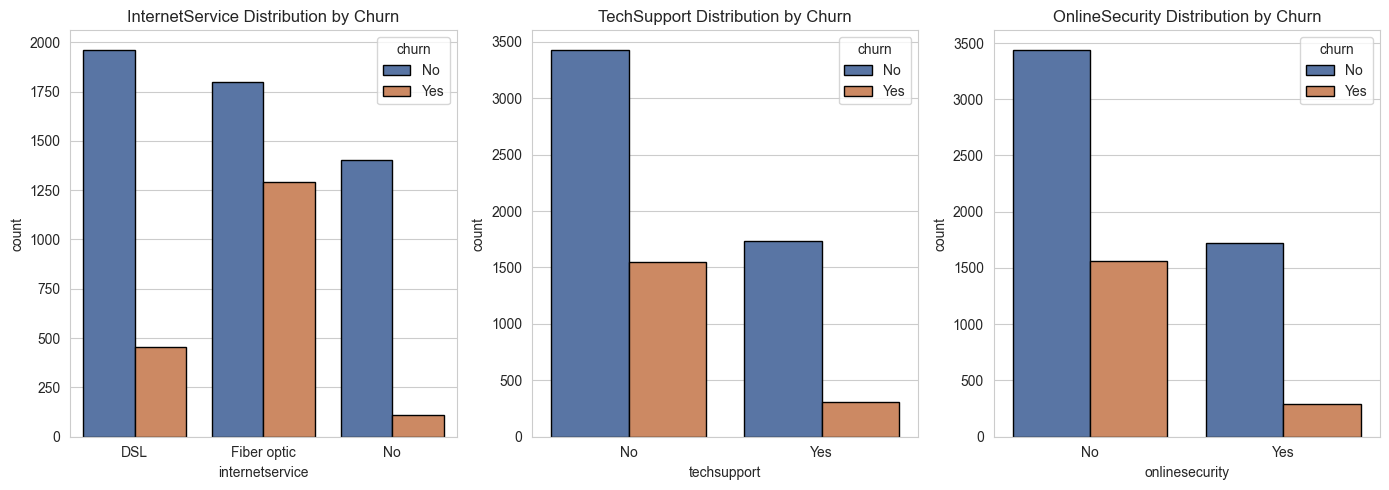

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))

sns.countplot(data=df_backup, x='internetservice', hue='churn', ax=axes[0], palette='deep', edgecolor='black')
axes[0].set_title('InternetService Distribution by Churn')

sns.countplot(data=df_backup, x='techsupport', hue='churn', ax=axes[1], palette='deep', edgecolor='black')
axes[1].set_title('TechSupport Distribution by Churn')

sns.countplot(data=df_backup, x='onlinesecurity', hue='churn', ax=axes[2], palette='deep', edgecolor='black')
axes[2].set_title('OnlineSecurity Distribution by Churn')

plt.tight_layout()
plt.show()

In [31]:
internetserv_ct = pd.crosstab(df_backup['internetservice'], df_backup['churn'], normalize='index') * 100
techsupport_ct = pd.crosstab(df_backup['techsupport'], df_backup['churn'], normalize='index') * 100
onlinesecurity_ct = pd.crosstab(df_backup['onlinesecurity'], df_backup['churn'], normalize='index') * 100

internetserv_ct = internetserv_ct.applymap(lambda x: f'{x:.2f}%')
techsupport_ct = techsupport_ct.applymap(lambda x: f'{x:.2f}%')
onlinesecurity_ct = onlinesecurity_ct.applymap(lambda x: f'{x:.2f}%')

print('\nContigency Table - InternetService x Churn:')
print(internetserv_ct)
print('--'*20)
print('\nContigency Table - TechSupport x Churn:')
print(techsupport_ct)
print('--'*20)
print('\nContigency Table - OnlineSecurity x Churn:')
print(onlinesecurity_ct)


Contigency Table - InternetService x Churn:
churn                No     Yes
internetservice                
DSL              81.11%  18.89%
Fiber optic      58.22%  41.78%
No               92.79%   7.21%
----------------------------------------

Contigency Table - TechSupport x Churn:
churn            No     Yes
techsupport                
No           68.92%  31.08%
Yes          84.83%  15.17%
----------------------------------------

Contigency Table - OnlineSecurity x Churn:
churn               No     Yes
onlinesecurity                
No              68.77%  31.23%
Yes             85.39%  14.61%


In [32]:
CrossTabInternetServ = pd.crosstab(index=df_backup['churn'], columns=df_backup['internetservice'])
CrossTabTechSupport = pd.crosstab(index=df_backup['churn'], columns=df_backup['techsupport'])
CrossTabOnlineSec = pd.crosstab(index=df_backup['churn'], columns=df_backup['onlinesecurity'])

chi2_is, p_is, _, _ = chi2_contingency(CrossTabInternetServ)
chi2_ts, p_ts, _, _ = chi2_contingency(CrossTabTechSupport)
chi2_os, p_os, _, _ = chi2_contingency(CrossTabOnlineSec)

print(f'\nChi-Square Test - InternetService x Churn: p-valor = {p_is:.4f}')
print(f'\nChi-Square Test - TechSupport x Churn: p-valor = {p_ts:.4f}')
print(f'\nChi-Square Test - OnlineSecurity x Churn: p-valor = {p_os:.4f}\n')

alpha = 0.05
if p_is < alpha:
    print('The relationship between InternetService and Churn is statistically significant.')
else:
    print('There is no statistical evidence that InternetService influences Churn.')

if p_ts < alpha:
    print('\nThe relationship between TechSupport and Churn is statistically significant.')
else:
    print('There is no statistical evidence that TechSupport influences Churn.')

if p_os < alpha:
    print('\nThe relationship between OnlineSecurity and Churn is statistically significant.')
else:
    print('There is no statistical evidence that OnlineSecurity influences Churn.')


Chi-Square Test - InternetService x Churn: p-valor = 0.0000

Chi-Square Test - TechSupport x Churn: p-valor = 0.0000

Chi-Square Test - OnlineSecurity x Churn: p-valor = 0.0000

The relationship between InternetService and Churn is statistically significant.

The relationship between TechSupport and Churn is statistically significant.

The relationship between OnlineSecurity and Churn is statistically significant.


### 1. Analysis of categorical variables:

- Contract X Churn:
It is evident that there is a considerable amount of churn in the Month-to-Month contract type, which is expected since this type of contract offers greater cancellation flexibility. On the other hand, One-year and Two-year contracts show lower churn rates, suggesting that long-term commitments reduce the likelihood of cancellation.

- PaymentMethod X Churn:
This analysis reveals that the Electronic Check payment method has a significantly high churn rate. In contrast, Bank Transfer and Credit Card payments, which are automatic, have lower churn rates. This may indicate that customers who use Electronic Check might face payment difficulties or have less commitment to the service.

- Dependents X Churn:
The analysis suggests that customers without dependents have a higher churn rate compared to those who do.

- Partner X Churn:
Similarly, customers without a partner also show a higher churn rate.

- Gender X Churn:
According to the Chi-Square test, there is no statistical evidence that gender influences churn. Therefore, we can remove this variable from the analysis since it will not be useful for the model.

- Note: Regarding the Dependents and Partner variables, customers with dependents or partners tend to stay in the service longer, possibly because the cancellation decision might not depend solely on the subscriber.

- InternetService X Churn:
The data shows that customers using Fiber Optic have a high churn rate, which could suggest that their experience with this service is not satisfactory. Meanwhile, customers using DSL are less likely to churn.

- TechSupport X Churn:
The analysis indicates that customers without technical support have a high churn rate, whereas those with this service have significantly lower churn rates. This suggests that technical support could be an important factor in customer retention.

- OnlineSecurity X Churn:
Customers without online security have a much higher churn rate than those with this service. This suggests that OnlineSecurity may add value to the service and help increase customer retention.

In [33]:
# Transforming object columns into numerical columns using the LabelEncoder() method.
label_encoders = {}

for col in df_backup.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_backup[col] = le.fit_transform(df_backup[col])
    label_encoders[col] = le

In [34]:
df_backup.head()

,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Correlation matrix:

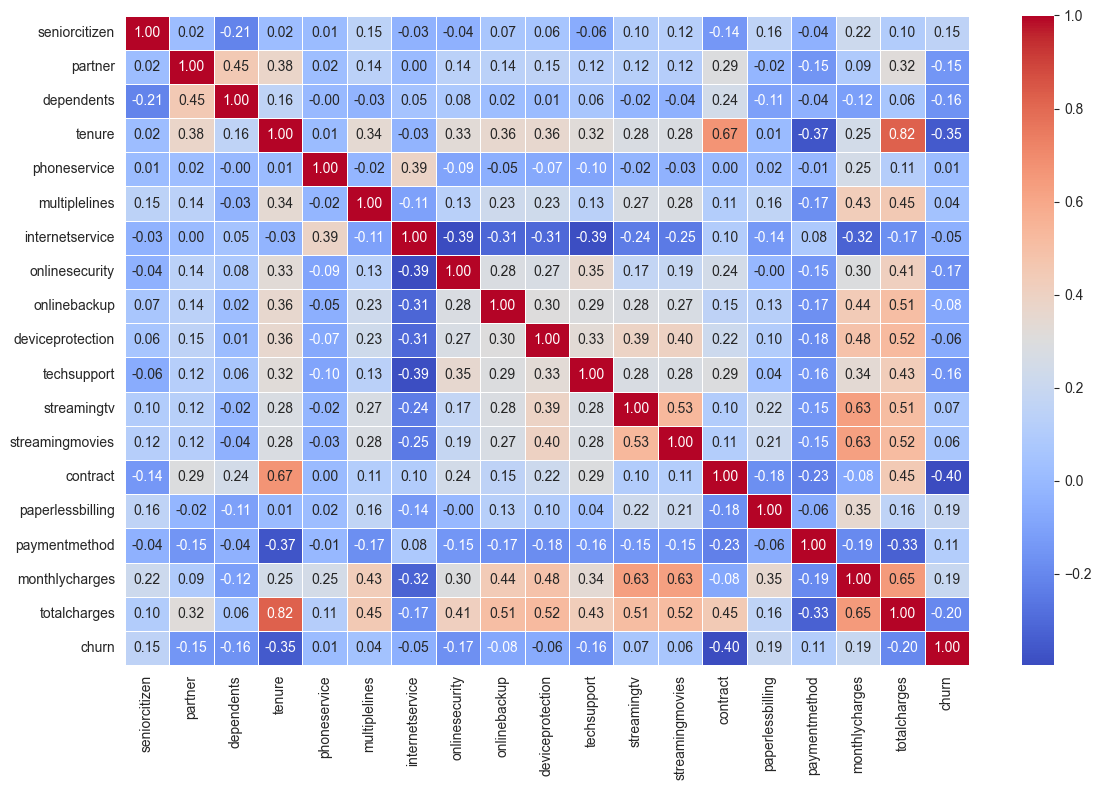


VIF of variables:
            Variable        VIF
16    monthlycharges  33.054057
4       phoneservice  16.586601
17      totalcharges  14.470461
3             tenure  14.340842
6    internetservice   4.433615
13          contract   4.175682
12   streamingmovies   3.179808
11       streamingtv   3.156018
15     paymentmethod   3.002247
14  paperlessbilling   2.889153
1            partner   2.821601
5      multiplelines   2.819250
9   deviceprotection   2.416914
8       onlinebackup   2.301382
10       techsupport   2.147636
7     onlinesecurity   2.064600
2         dependents   1.960144
18             churn   1.862766
0      seniorcitizen   1.374197


In [35]:
corr_matrix = df_backup.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',cmap='coolwarm', linewidths=0.5)
plt.tight_layout()
plt.show()

X = df_backup.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print('\nVIF of variables:')
print(vif_data.sort_values(by='VIF', ascending=False))

In [36]:
df_backup.drop(['streamingmovies', 'totalcharges', 'phoneservice', 'streamingtv',
                'internetservice', 'partner', 'paperlessbilling'], axis=1, inplace=True)

### Insights:

Since the focus of this project is to identify the variables that most influence churn, we will analyze those with strong and weak correlations with this metric.

- Key Highlights:
1. contract (-0.40) → Customers with longer contracts have lower churn rates.
2. tenure (-0.35) → Customers who have been with the company longer tend to cancel less.
3. monthlycharges (0.19) → Customers with higher monthly charges tend to have slightly higher churn rates.
4. paperlessbilling (0.19) → Customers who use electronic billing tend to cancel slightly more.
- The variables phoneservice, internetservice, streamingtv, and streamingmovies, with correlations close to 0, indicate a weak association with churn, suggesting they do not significantly influence the cancellation decision.

- Strong correlations between other variables:
1. totalcharges and tenure (0.82) → Customers who stay longer accumulate higher charges.
2. streamingtv and streamingmovies (0.63) → If a customer has one service, they are likely to have the other.
3. contract and tenure (0.67) → Customers with longer contracts generally have a longer tenure.

- Interpretation of VIF (Variance Inflation Factor):
1. VIF < 5 → Low multicollinearity (OK to keep in the model).
2. VIF between 5 and 10 → Moderate multicollinearity (could be a problem).
3. VIF > 10 → High multicollinearity (indicates strong correlation with other variables; removal or transformation may be necessary).

- The main variables with multicollinearity issues were:
1. monthlycharges (33.05)
2. phoneservice (16.58)
3. totalcharges (14.47)
4. tenure (14.34)

- Variable Exclusion Strategy:
1. totalcharges will be removed since it is strongly related to tenure and monthlycharges (totalcharges = monthlycharges × tenure).
2. phoneservice will also be excluded due to high multicollinearity and its weak correlation with churn.
3. partner and paperlessbilling will be removed due to lower relevance.
4. Additionally, internetservice, streamingtv, and streamingmovies will be excluded as they show weak correlations with churn.

- Variables to be excluded:
1. phoneservice, internetservice, streamingtv, streamingmovies, totalcharges, partner, paperlessbilling.



In [37]:
X = df_backup.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print('\nNew VIF after removal:')
print(vif_data.sort_values(by='VIF', ascending=False))


New VIF after removal:
            Variable       VIF
10    monthlycharges  8.761065
2             tenure  6.888666
8           contract  3.690590
3      multiplelines  2.679623
9      paymentmethod  2.269114
6   deviceprotection  2.183614
5       onlinebackup  2.090310
7        techsupport  1.945593
4     onlinesecurity  1.809975
11             churn  1.782054
1         dependents  1.523428
0      seniorcitizen  1.349702


### Data preparation for models:

In [38]:
# Split the data and using the MinMaxScaler() method on the numerical columns
X = df_backup.drop(columns=['churn'], axis=1)
y = df_backup['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

mms = MinMaxScaler()

cols_to_scale = ['tenure', 'monthlycharges']

X_train[cols_to_scale] = mms.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = mms.transform(X_test[cols_to_scale])

In [39]:
# Using SMOTE to balance the classes
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Model training, comparison, selection and tuning:

In [40]:
models = {
    "LightGBM": lgb.LGBMClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBOOST": xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric="logloss")
}


kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
threshold = 0.40 

for name, model in models.items():
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc')

    model.fit(X_train, y_train)

    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred_adjusted = (y_prob >= threshold).astype(int)
    else:
        y_pred_adjusted = model.predict(X_test)

    results.append({
        "Model": name,
        "Cross-Val ROC AUC": cv_score.mean(),
        "Accuracy": accuracy_score(y_test, y_pred_adjusted),
        "Precision": precision_score(y_test, y_pred_adjusted),
        "Recall": recall_score(y_test, y_pred_adjusted),
        "F1-Score": f1_score(y_test, y_pred_adjusted),
        "ROC AUC": roc_auc_score(y_test, y_prob) if hasattr(model, "predict_proba") else None
    })

df_results = pd.DataFrame(results).sort_values(by="Cross-Val ROC AUC", ascending=False)
print(df_results)

[LightGBM] [Info] Number of positive: 2764, number of negative: 2764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 5528, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 2764, number of negative: 2764
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 5528, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

In [41]:
print(df_results)

                 Model  Cross-Val ROC AUC  Accuracy  Precision    Recall  \
0             LightGBM           0.901454  0.741908   0.505263  0.789474   
1        Random Forest           0.899283  0.744497   0.509050  0.740132   
5              XGBOOST           0.895618  0.728960   0.489177  0.743421   
4                  KNN           0.856490  0.654294   0.420050  0.833882   
2  Logistic Regression           0.845423  0.698317   0.461144  0.888158   
3        Decision Tree           0.760954  0.718602   0.472010  0.610197   

   F1-Score   ROC AUC  
0  0.616175  0.837473  
1  0.603217  0.811276  
5  0.590078  0.821282  
4  0.558678  0.762861  
2  0.607083  0.839021  
3  0.532281  0.685586  


In [42]:
param_grid_rf = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 2)
}

param_grid_lgbm = {
    'n_estimators': randint(200, 500),
    'learning_rate': uniform(0.01, 0.05),
    'max_depth': randint(15, 30),
    'num_leaves': randint(80, 150),
    'min_child_samples': [2, 10],
    'min_gain_to_split': [1e-3, 1e-4],
    'feature_fraction': uniform(0.8, 0.2)
}

param_grid_xgb = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(5, 12),
    'colsample_bytree': uniform(0.6, 0.4),
    'subsample': uniform(0.6, 0.4)
}

rf_model = RandomForestClassifier(random_state=42, class_weight={0:1, 1:3})
lgbm_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

grid_rf = RandomizedSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1', n_iter=10, random_state=42, n_jobs=-1)
grid_lgbm = RandomizedSearchCV(lgbm_model, param_grid_lgbm, cv=5, scoring='f1', n_iter=10, random_state=42, n_jobs=-1)
grid_xgb = RandomizedSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='f1', n_iter=10, random_state=42, n_jobs=-1)

grid_rf.fit(X_train, y_train)
grid_lgbm.fit(X_train, y_train)
grid_xgb.fit(X_train, y_train)

print('Best Parameters for Random Forest:', grid_rf.best_params_)
print('Best F1-score for Random Forest:', grid_rf.best_score_)

print('Best Parameters for LGBM:', grid_lgbm.best_params_)
print('Best F1-score for LGBM:', grid_lgbm.best_score_)

print('Best Parameters for XGB:', grid_xgb.best_params_)
print('Best F1-score for XGB:', grid_xgb.best_score_)

[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
[LightGBM] [Info] Number of positive: 3455, number of negative: 3455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 6910, number of used features: 11
[LightGBM] [

In [43]:
rf_model = RandomForestClassifier(max_depth=15,
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators=199,
                                  random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print('RF Accuracy:', accuracy_score(y_test, y_pred_rf))
print('\nRF Classification Report:\n', classification_report(y_test, y_pred_rf))

RF Accuracy: 0.7678031937850669

RF Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.83      1709
           1       0.55      0.69      0.61       608

    accuracy                           0.77      2317
   macro avg       0.71      0.74      0.72      2317
weighted avg       0.79      0.77      0.78      2317



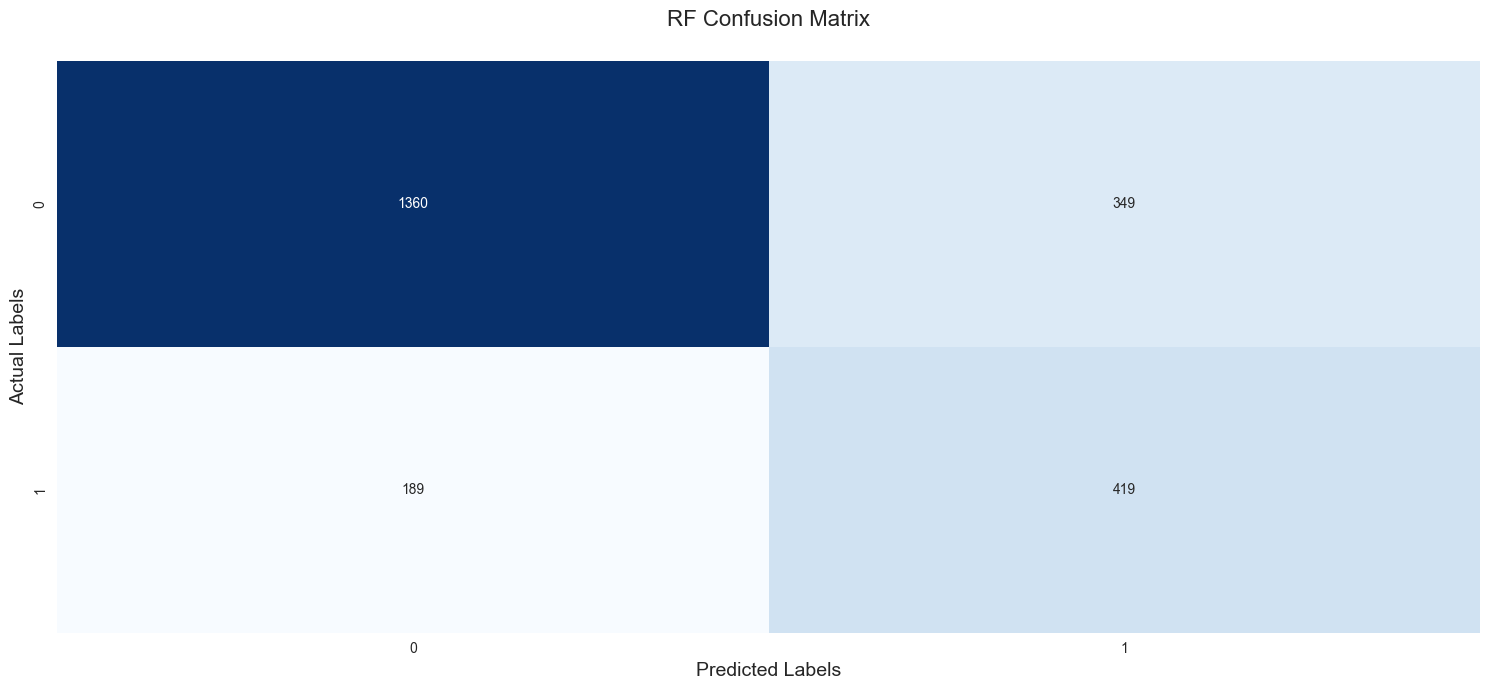

In [44]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(15,7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('RF Confusion Matrix', fontsize=16, pad=25)
plt.tight_layout()
plt.show()

In [45]:
lgbm_model = lgb.LGBMClassifier(learning_rate=0.012820578951355013, 
                                n_estimators=493, 
                                max_depth=22, 
                                num_leaves=81,
                                min_child_samples=10,
                                min_gain_to_split=0.0001,
                                feature_fraction = 0.9301776945897706,
                                random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

print('LGBM Accuracy:', accuracy_score(y_test, y_pred_lgbm))
print('\nLGBM Classification Report:\n', classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
[LightGBM] [Info] Number of positive: 3455, number of negative: 3455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003776 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 532
[LightGBM] [Info] Number of data points in the train set: 6910, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0000

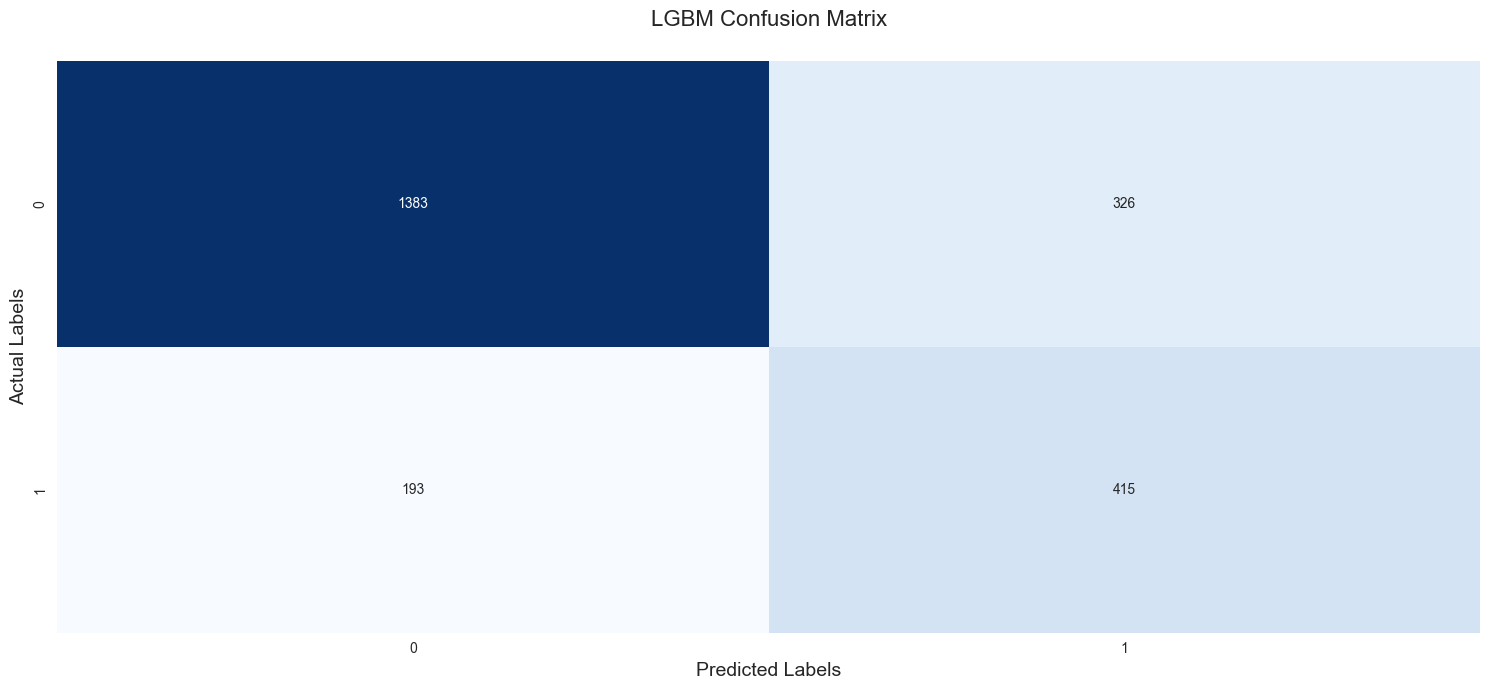

In [46]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

plt.figure(figsize=(15,7))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('LGBM Confusion Matrix', fontsize=16, pad=25)
plt.tight_layout()
plt.show()

In [47]:
xgb_model = xgb.XGBClassifier(colsample_bytree=0.6923575302488596, 
                              learning_rate=0.034102546602601175, 
                              n_estimators=298, 
                              max_depth=8, 
                              subsample=0.8439986631130484,
                              random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print('XGB Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('\nXGB Classification Report:\n', classification_report(y_test, y_pred_xgb))

XGB Accuracy: 0.76348726801899

XGB Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1709
           1       0.54      0.70      0.61       608

    accuracy                           0.76      2317
   macro avg       0.71      0.74      0.72      2317
weighted avg       0.79      0.76      0.77      2317



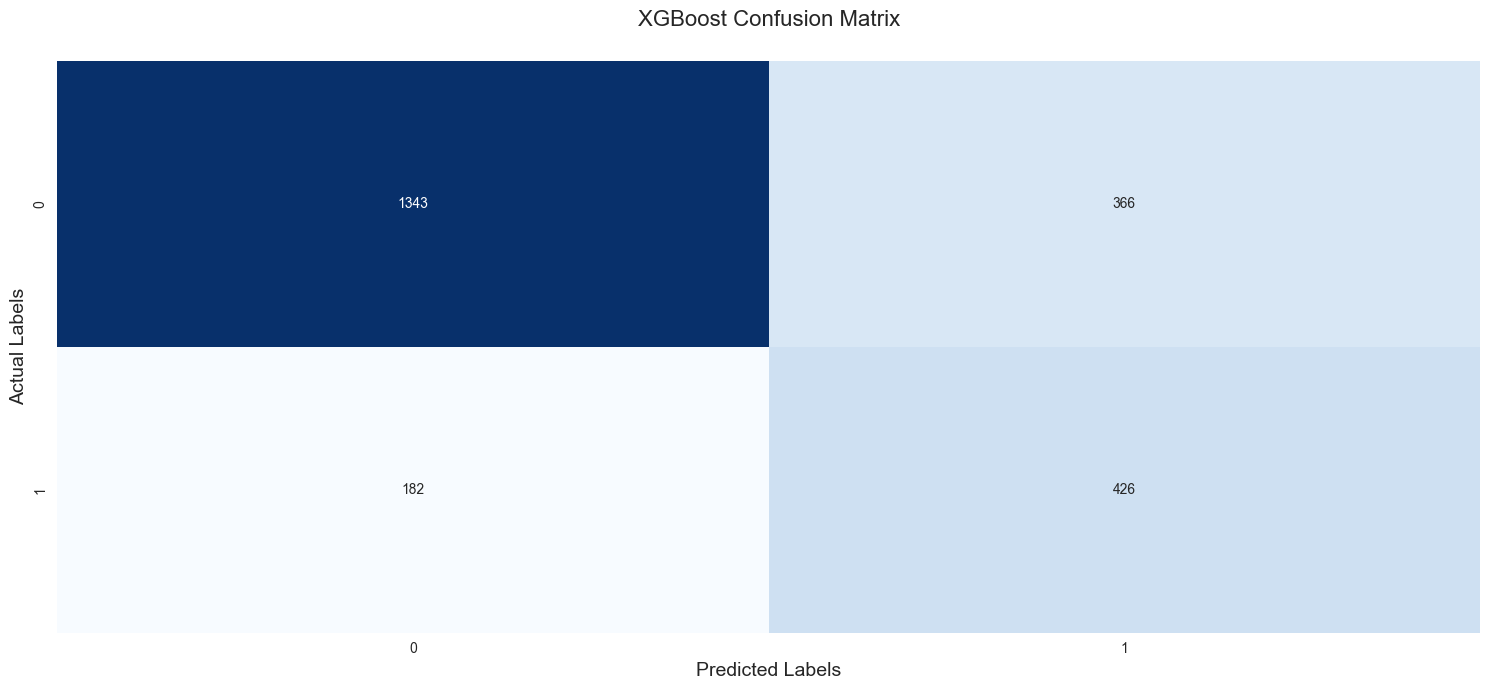

In [48]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(15,7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('XGBoost Confusion Matrix', fontsize=16, pad=25)
plt.tight_layout()
plt.show()

[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001


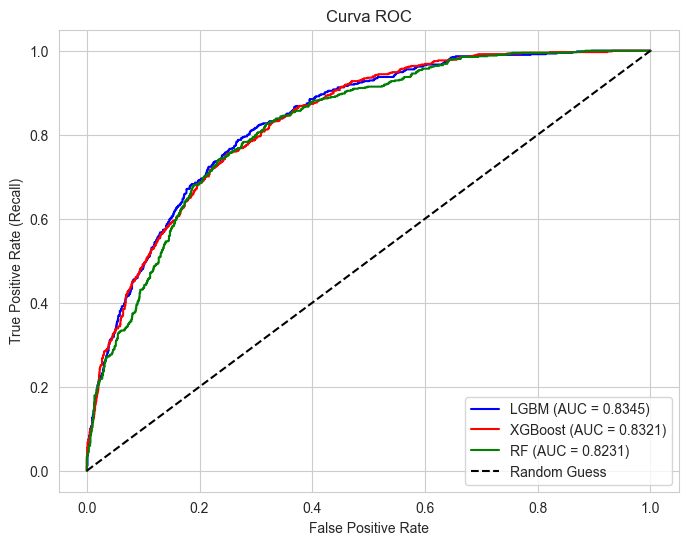

In [49]:
y_probs_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_lgbm, tpr_lgbm, _= roc_curve(y_test, y_probs_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LGBM (AUC = {roc_auc_lgbm:.4f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {roc_auc_rf:.4f})', color='green')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

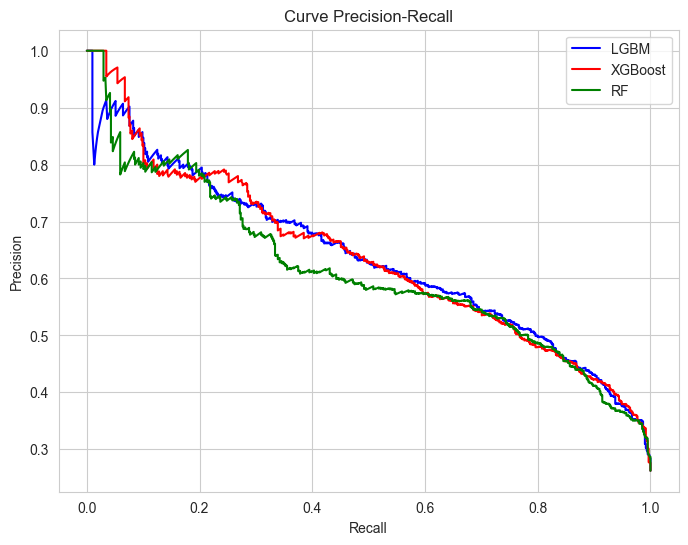

In [50]:
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test, y_probs_lgbm)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_probs_xgb)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_probs_rf)

plt.figure(figsize=(8,6))
plt.plot(recall_lgbm, precision_lgbm, label='LGBM', color='blue')
plt.plot(recall_xgb, precision_xgb, label='XGBoost', color='red')
plt.plot(recall_rf, precision_rf, label='RF', color='green')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curve Precision-Recall')
plt.legend(loc='upper right')
plt.show()

### Model results:
- After analyzing the confusion matrix, classification report, and comparing the models using the ROC curve and Precision-Recall, it can be concluded that among the three models, LightGBM demonstrated the best overall performance. The model achieved an accuracy of 77.6% and showed a better balance between precision and recall, particularly excelling in reducing false positives.

- XGBoost had a similar performance, with a higher recall (70.1%), meaning it is more effective at identifying customers who churned. However, its precision was 53.8%, indicating that when it predicts churn, it makes more mistakes.

- Considering overall performance, LightGBM proved to be the best option.

In [51]:
X = df_backup.drop(columns='churn')
y = df_backup['churn']

final_model = lgb.LGBMClassifier(learning_rate=0.012820578951355013, 
                                n_estimators=493, 
                                max_depth=22, 
                                num_leaves=81,
                                min_child_samples=10,
                                min_gain_to_split=0.0001,
                                feature_fraction = 0.9301776945897706,
                                random_state=42)

final_model.fit(X, y)

joblib.dump(final_model, 'final_model_churn.pkl')
joblib.dump(mms, 'final_scaler.pkl')

print("Final model trained and saved!")

[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
[LightGBM] [Info] Number of positive: 1857, number of negative: 5164
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 7021, number of used features: 11
[LightGBM] [

In [52]:
# Showing the final scores
y_pred = final_model.predict(X)
print(classification_report(y, y_pred))

[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      5164
           1       0.84      0.73      0.78      1857

    accuracy                           0.89      7021
   macro avg       0.87      0.84      0.85      7021
weighted avg       0.89      0.89      0.89      7021



### Final Results on Real Data:
After adjustments and comparisons between different models, LightGBM stood out as the best option for churn prediction. With an accuracy of 89%, the model demonstrates a high predictive capability on the analyzed dataset.

Additionally, when observing precision and recall metrics, a good balance can be seen:

- Class 0 (Customers who did not churn): The model achieved 91% precision and 95% recall, indicating that it correctly predicts most customers who remain active.
- Class 1 (Customers who churned): The 73% recall suggests that the model can identify most customers prone to churn, while the 84% precision indicates a reasonable success rate when predicting churn.

The weighted average of the metrics reinforces the model’s consistency, with an overall F1-score of 89%. This means it effectively balances precision and recall, minimizing critical errors.

In [53]:
scaler_loaded = joblib.load('final_scaler.pkl')
model_loaded = joblib.load('final_model_churn.pkl')

def prever_churn(new_data):
    new_data = new_data.copy()

    scaled_columns = ['tenure', 'monthlycharges']

    new_data[scaled_columns] = scaler_loaded.transform(new_data[scaled_columns])
    probability = model_loaded.predict_proba(new_data)[:, 1]
    return probability * 100  

new_customers = X.iloc[:5] 
probabilities = prever_churn(new_customers)

# Showing  results
print("Churn probabilities:")
for i, prob in enumerate(probabilities):
    print(f'Customer {i+1}: {prob:.2f}%')

[LightGBM] [Warning] feature_fraction is set=0.9301776945897706, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9301776945897706
[LightGBM] [Warning] min_gain_to_split is set=0.0001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0001
Churn probabilities:
Customer 1: 28.71%
Customer 2: 5.69%
Customer 3: 12.58%
Customer 4: 5.45%
Customer 5: 21.14%


### Conclusions:
- During the analysis, it was possible to identify the main variables that contribute to customer churn. Among them, MonthlyCharges stands out, indicating that customers who pay higher monthly fees are more likely to cancel the service. Additionally, PaymentMethod, specifically the electronic check method, is associated with a high churn rate, possibly due to issues customers face with this payment type. Another important variable is Contract, which shows a high churn rate in the month-to-month variable, suggesting that many customers sign up and cancel within the first few months, indicating a lack of loyalty to the service.

- Given these insights, the company could consider strategies to reduce churn, such as offering discounts on monthly fees and encouraging more stable payment methods like bank transfer and credit card, which are processed automatically and may help prevent cancellations. Additionally, implementing loyalty programs could be a viable approach to increase customer retention, as the Tenure variable indicates that customers who stay longer with the service have a lower risk of churn.